In [75]:
import pandas as pd
import seaborn as sns
import json
import numpy as np

* fullVisitorId- A unique identifier for each user of the Google Merchandise Store.
* channelGrouping - The channel via which the user came to the Store.
* date - The date on which the user visited the Store.
* device - The specifications for the device used to access the Store.
* geoNetwork - This section contains information about the geography of the user.
* sessionId - A unique identifier for this visit to the store.
* socialEngagementType - Engagement type, either "Socially Engaged" or "Not Socially Engaged".
* totals - This section contains aggregate values across the session.
* trafficSource - This section contains information about the Traffic Source from which the session originated.
* visitId - An identifier for this session. This is part of the value usually stored as the _utmb cookie. This is * only unique to the user. For a completely unique ID, you should use a combination of fullVisitorId and visitId.
* visitNumber - The session number for this user. If this is the first session, then this is set to 1.
* visitStartTime - The timestamp (expressed as POSIX time).

In [49]:
df_submit =  pd.read_csv('./sample_submission.csv')

In [51]:
df_submit.fullVisitorId.nunique()

617242

In [52]:
df_test = pd.read_csv('./test.csv')

/home/kuo/anaconda3/envs/venv/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [63]:
df_test['totals']


0            {"visits": "1", "hits": "4", "pageviews": "4"}
1         {"visits": "1", "hits": "5", "pageviews": "5",...
2         {"visits": "1", "hits": "7", "pageviews": "7",...
3         {"visits": "1", "hits": "8", "pageviews": "4",...
4         {"visits": "1", "hits": "9", "pageviews": "4",...
5         {"visits": "1", "hits": "11", "pageviews": "5"...
6         {"visits": "1", "hits": "37", "pageviews": "15...
7         {"visits": "1", "hits": "52", "pageviews": "22...
8            {"visits": "1", "hits": "5", "pageviews": "5"}
9         {"visits": "1", "hits": "6", "pageviews": "6",...
10        {"visits": "1", "hits": "10", "pageviews": "10...
11        {"visits": "1", "hits": "3", "pageviews": "3",...
12        {"visits": "1", "hits": "3", "pageviews": "3",...
13        {"visits": "1", "hits": "3", "pageviews": "3",...
14        {"visits": "1", "hits": "3", "pageviews": "3",...
15        {"visits": "1", "hits": "3", "pageviews": "3",...
16        {"visits": "1", "hits": "3", "

In [53]:
df_test.fullVisitorId.nunique()

652237

In [4]:
df_train = pd.read_csv('./train.csv')

/home/kuo/anaconda3/envs/venv/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
len(df_train)

903653

In [58]:
df_submit.fullVisitorId.astype('str').isin(df_test.fullVisitorId.astype('str')).value_counts()

True     598719
False     18523
Name: fullVisitorId, dtype: int64

In [59]:
df_submit.fullVisitorId.astype('str').isin(df_train.fullVisitorId.astype('str')).value_counts()

False    610092
True       7150
Name: fullVisitorId, dtype: int64

In [7]:
df_train.channelGrouping.value_counts()

Organic Search    381561
Social            226117
Direct            143026
Referral          104838
Paid Search        25326
Affiliates         16403
Display             6262
(Other)              120
Name: channelGrouping, dtype: int64

[source : Understanding Google Analytics Channels](https://megalytic.com/blog/understanding-google-analytics-channels)
* Direct:
In general, indicates visits where users navigated directly to the URL or the source of the visit is unknown. See: Understanding Direct Traffic in Google Analytics
Determined by a source of direct and medium of (not set) or (none)
* Organic Search:
Indicates visits from organic (unpaid) search results
Determined by medium of organic
* Social:
Indicates visits from social networks (Facebook, Twitter, etc.)
Determined when Social Source Referral matches “yes;” Google Analytics also places these in the referral “bucket” matching a list of known social sources or when medium matches social, social-network, social-media, sm, social network, or social media
* Email:
Indicates traffic from links clicked in email messages, whether mass email marketing or individual messages
Determined by medium of email
* Affiliates:
Indicates traffic from affiliate marketing efforts
Determined by medium of affiliate
* Referral:
Indicates traffic where users clicked a link from another site, excluding major search engines
Determined by medium of referral
* Paid Search:
Indicates traffic from PPC campaigns run in search results
Determined by medium of cpc, ppc, or paidsearch; also, excludes traffic in “Content” bucket of ad networks
* Other Advertising:
Indicates traffic from online advertising outside of search and display, such as cost-per-view video advertising
Determined by medium of cpv, cpa, or cpp
* Display:
Indicates traffic from display advertising, such as Google AdWords remarketing campaigns
Determined by medium of display, cpm, or banner, or in “Content” bucket of ad networks (indicating Google Display Network)

In [8]:
df_train.date = pd.to_datetime(df_train.date.astype('str'))

In [9]:
df_train.visitStartTime = pd.to_datetime(df_train.visitStartTime, unit='s')

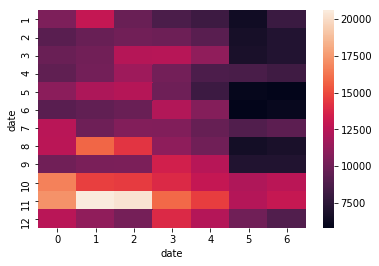

In [10]:
sns.heatmap(df_train.groupby([df_train.date.dt.month,df_train.date.dt.dayofweek])['date'].count().unstack())

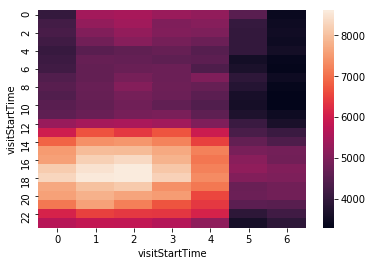

In [11]:
sns.heatmap(df_train.groupby([df_train.visitStartTime.dt.hour,df_train.visitStartTime.dt.dayofweek])['visitStartTime'].count().unstack())

In [12]:
df_train.dtypes

channelGrouping                 object
date                    datetime64[ns]
device                          object
fullVisitorId                   object
geoNetwork                      object
sessionId                       object
socialEngagementType            object
totals                          object
trafficSource                   object
visitId                          int64
visitNumber                      int64
visitStartTime          datetime64[ns]
dtype: object

* [Google Analytics: Desktop vs. Mobile vs. Tablet Metrics](https://www.hallaminternet.com/google-analytics-desktop-vs-mobile-vs-tablet-metrics/)
* [Sessions by Device Type](https://www.klipfolio.com/resources/kpi-examples/digital-marketing/sessions-by-device-type)


In [13]:
df_device = pd.DataFrame([json.loads(i) for i in df_train.device])

In [14]:
df_device.columns

Index(['browser', 'browserSize', 'browserVersion', 'deviceCategory',
       'flashVersion', 'isMobile', 'language', 'mobileDeviceBranding',
       'mobileDeviceInfo', 'mobileDeviceMarketingName', 'mobileDeviceModel',
       'mobileInputSelector', 'operatingSystem', 'operatingSystemVersion',
       'screenColors', 'screenResolution'],
      dtype='object')

In [15]:
[ df_device.iloc[:,i].value_counts() for i in range(len(df_device.columns))]

[Chrome                                         620364
 Safari                                         182245
 Firefox                                         37069
 Internet Explorer                               19375
 Edge                                            10205
 Android Webview                                  7865
 Safari (in-app)                                  6850
 Opera Mini                                       6139
 Opera                                            5643
 UC Browser                                       2427
 YaBrowser                                        2096
 Coc Coc                                           727
 Amazon Silk                                       561
 Android Browser                                   553
 Mozilla Compatible Agent                          374
 MRCHROME                                          263
 Maxthon                                           246
 BlackBerry                                        184
 Nintendo 

In [16]:
df_device.browserSize.value_counts()

not available in demo dataset    903653
Name: browserSize, dtype: int64

In [17]:
df_device.apply(pd.Series.value_counts).ix['not available in demo dataset'] != 903653.0

/home/kuo/anaconda3/envs/venv/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


browser                       True
browserSize                  False
browserVersion               False
deviceCategory                True
flashVersion                 False
isMobile                      True
language                     False
mobileDeviceBranding         False
mobileDeviceInfo             False
mobileDeviceMarketingName    False
mobileDeviceModel            False
mobileInputSelector          False
operatingSystem               True
operatingSystemVersion       False
screenColors                 False
screenResolution             False
Name: not available in demo dataset, dtype: bool

In [18]:
df_device_ = df_device[['browser','isMobile','operatingSystem']]

In [19]:
df_device_

,browser,isMobile,operatingSystem
0,Chrome,False,Windows
1,Firefox,False,Macintosh
2,Chrome,False,Windows
3,UC Browser,False,Linux
4,Chrome,True,Android
5,Chrome,False,Windows
6,Chrome,False,Windows
7,Chrome,False,Windows
8,Internet Explorer,False,Windows
9,Firefox,False,Windows


In [20]:
df_geo = pd.DataFrame([json.loads(i) for i in df_train.geoNetwork])

In [21]:
df_geo.apply(pd.Series.value_counts).sort_values(by ='latitude')

,city,cityId,continent,country,latitude,longitude,metro,networkDomain,networkLocation,region,subContinent
not available in demo dataset,508229.0,903653.0,NaN,NaN,903653.0,903653.0,508229.0,NaN,903653.0,508229.0,NaN
's Hertogenbosch,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
(not set),34262.0,NaN,1468.0,1468.0,NaN,NaN,201766.0,244881.0,NaN,27827.0,1468.0
0101.net.au,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
012.net.il,NaN,NaN,NaN,NaN,NaN,NaN,NaN,312.0,NaN,NaN,NaN
018.net.il,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.0,NaN,NaN,NaN
02.net,NaN,NaN,NaN,NaN,NaN,NaN,NaN,517.0,NaN,NaN,NaN
04.4-x64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
099.net.il,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN
0beta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [22]:
df_geo_ = df_geo.drop(['cityId','latitude','longitude','networkLocation'], axis=1)

In [23]:
df_geo_

,city,continent,country,metro,networkDomain,region,subContinent
0,Izmir,Asia,Turkey,(not set),ttnet.com.tr,Izmir,Western Asia
1,not available in demo dataset,Oceania,Australia,not available in demo dataset,dodo.net.au,not available in demo dataset,Australasia
2,Madrid,Europe,Spain,(not set),unknown.unknown,Community of Madrid,Southern Europe
3,not available in demo dataset,Asia,Indonesia,not available in demo dataset,unknown.unknown,not available in demo dataset,Southeast Asia
4,not available in demo dataset,Europe,United Kingdom,not available in demo dataset,unknown.unknown,not available in demo dataset,Northern Europe
5,not available in demo dataset,Europe,Italy,not available in demo dataset,fastwebnet.it,not available in demo dataset,Southern Europe
6,not available in demo dataset,Asia,Pakistan,not available in demo dataset,unknown.unknown,not available in demo dataset,Southern Asia
7,Brisbane,Oceania,Australia,(not set),bigpond.net.au,Queensland,Australasia
8,not available in demo dataset,Europe,Austria,not available in demo dataset,spar.at,not available in demo dataset,Western Europe
9,not available in demo dataset,Europe,Netherlands,not available in demo dataset,chello.nl,not available in demo dataset,Western Europe


In [24]:
df_train.socialEngagementType.value_counts()

Not Socially Engaged    903653
Name: socialEngagementType, dtype: int64

In [25]:
df_train = df_train.drop('socialEngagementType',axis=1)

In [26]:
df_train.isnull().apply(pd.Series.value_counts)

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,totals,trafficSource,visitId,visitNumber,visitStartTime
False,903653,903653,903653,903653,903653,903653,903653,903653,903653,903653,903653


In [27]:
df_total = pd.DataFrame([json.loads(i) for i in df_train.totals])

In [28]:
df_total.apply(pd.Series.value_counts).sort_values(by= 'bounces',ascending = False)

,bounces,hits,newVisits,pageviews,transactionRevenue,visits
1,450630.0,446754.0,703060.0,452522.0,NaN,903653.0
10,NaN,10640.0,NaN,10104.0,NaN,NaN
100,NaN,39.0,NaN,9.0,NaN,NaN
10000,NaN,NaN,NaN,NaN,1.0,NaN
100000000,NaN,NaN,NaN,NaN,15.0,NaN
100050000,NaN,NaN,NaN,NaN,1.0,NaN
1000780000,NaN,NaN,NaN,NaN,1.0,NaN
1001590000,NaN,NaN,NaN,NaN,1.0,NaN
100220000,NaN,NaN,NaN,NaN,1.0,NaN
100260000,NaN,NaN,NaN,NaN,1.0,NaN


In [29]:
df_total.isnull()['transactionRevenue'].value_counts()

True     892138
False     11515
Name: transactionRevenue, dtype: int64

In [37]:
df_total

,bounces,hits,newVisits,pageviews,transactionRevenue,visits
0,1,1,1,1,NaN,1
1,1,1,1,1,NaN,1
2,1,1,1,1,NaN,1
3,1,1,1,1,NaN,1
4,1,1,NaN,1,NaN,1
5,1,1,1,1,NaN,1
6,1,1,1,1,NaN,1
7,1,1,1,1,NaN,1
8,1,1,1,1,NaN,1
9,1,1,1,1,NaN,1


* totals.bounces	INTEGER	Total bounces (for convenience). For a bounced session, the value is 1, otherwise it is null.
* totals.hits	INTEGER	Total number of hits within the session.
* totals.newVisits	INTEGER	Total number of new users in session (for convenience). If this is the first visit, this value is 1, otherwise it is null.
* totals.pageviews	INTEGER	Total number of pageviews within the session.
* totals.totalTransactionRevenue	INTEGER	Total transaction revenue, expressed as the value passed to Analytics multiplied by 10^6 (e.g., 2.40 would be given as 2400000).
* totals.visits	INTEGER	The number of sessions (for convenience). This value is 1 for sessions with interaction events. The value is null if there are no interaction events in the session.

[BigQuery Export schema](https://support.google.com/analytics/answer/3437719?hl=en)

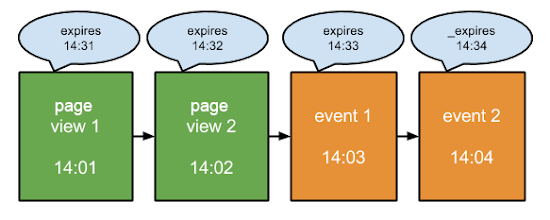

In [30]:
df_trafficSource = pd.DataFrame([json.loads(i) for i in df_train.trafficSource])

In [31]:
df_adwordsClickInfo = pd.DataFrame([i for i in df_trafficSource['adwordsClickInfo']])
# .apply(pd.Series.value_counts).sort_values(by= 'medium',ascending = False)

In [32]:
df_adwordsClickInfo.iloc[:,0:6].count()

adNetworkType          21460
criteriaParameters    903653
gclId                  21561
isVideoAd              21460
page                   21460
slot                   21460
dtype: int64

In [33]:
df_trafficSource['campaign'].value_counts()

(not set)                                          865347
Data Share Promo                                    16403
AW - Dynamic Search Ads Whole Site                  14244
AW - Accessories                                     7070
test-liyuhz                                           392
AW - Electronics                                       96
Retail (DO NOT EDIT owners nophakun and tianyu)        50
AW - Apparel                                           46
All Products                                            4
Data Share                                              1
Name: campaign, dtype: int64

In [41]:
df_trafficSource = df_trafficSource.join(df_adwordsClickInfo)

In [43]:
df_trafficSource = df_trafficSource.drop('adwordsClickInfo',axis=1)

* Source: Every referral to a web site has an origin, or source. Possible sources include: “google” (the name of a search engine), “facebook.com” (the name of a referring site), “spring_newsletter” (the name of one of your newsletters), and “direct” (users that typed your URL directly into their browser, or who had bookmarked your site).

* Medium: Every referral to a website also has a medium. Possible medium include: “organic” (unpaid search), “cpc” (cost per click, i.e. paid search), “referral” (referral), “email” (the name of a custom medium you have created), “none” (direct traffic has a medium of “none”).

* Keyword: When SSL search is employed, Keyword will have the value (not provided).

* Campaign is the name of the referring Google Ads campaign or a custom campaign that you have created.

* Content identifies a specific link or content item in a custom campaign. For example, if you have two call-to-action links within the same email message, you can use different Content values to differentiate them so that you can tell which version is most effective.

* [Traffic source dimensions](https://support.google.com/analytics/answer/1033173?hl=en)
* [Direct-traffic](https://moz.com/blog/guide-to-direct-traffic-google-analytics)

In [47]:
df_train = df_train.drop(['device','geoNetwork','totals','trafficSource'], axis = 1)

In [65]:
df_all_parsed = df_train.join([df_device_, df_geo_, df_total, df_trafficSource])

In [67]:
df_all_parsed.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'sessionId', 'visitId',
       'visitNumber', 'visitStartTime', 'browser', 'isMobile',
       'operatingSystem', 'city', 'continent', 'country', 'metro',
       'networkDomain', 'region', 'subContinent', 'bounces', 'hits',
       'newVisits', 'pageviews', 'transactionRevenue', 'visits', 'adContent',
       'campaign', 'campaignCode', 'isTrueDirect', 'keyword', 'medium',
       'referralPath', 'source', 'adNetworkType', 'criteriaParameters',
       'gclId', 'isVideoAd', 'page', 'slot', 'targetingCriteria'],
      dtype='object')

In [77]:
df_all_parsed

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,isMobile,operatingSystem,...,medium,referralPath,source,adNetworkType,criteriaParameters,gclId,isVideoAd,page,slot,targetingCriteria
0,Organic Search,2016-09-02,1131660440785968503,1131660440785968503_1472830385,1472830385,1,2016-09-02 15:33:05,Chrome,False,Windows,...,organic,NaN,google,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,NaN
1,Organic Search,2016-09-02,377306020877927890,377306020877927890_1472880147,1472880147,1,2016-09-03 05:22:27,Firefox,False,Macintosh,...,organic,NaN,google,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,NaN
2,Organic Search,2016-09-02,3895546263509774583,3895546263509774583_1472865386,1472865386,1,2016-09-03 01:16:26,Chrome,False,Windows,...,organic,NaN,google,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,NaN
3,Organic Search,2016-09-02,4763447161404445595,4763447161404445595_1472881213,1472881213,1,2016-09-03 05:40:13,UC Browser,False,Linux,...,organic,NaN,google,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,NaN
4,Organic Search,2016-09-02,27294437909732085,27294437909732085_1472822600,1472822600,2,2016-09-02 13:23:20,Chrome,True,Android,...,organic,NaN,google,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,NaN
5,Organic Search,2016-09-02,2938943183656635653,2938943183656635653_1472807194,1472807194,1,2016-09-02 09:06:34,Chrome,False,Windows,...,organic,NaN,google,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,NaN
6,Organic Search,2016-09-02,1905672039242460897,1905672039242460897_1472817241,1472817241,1,2016-09-02 11:54:01,Chrome,False,Windows,...,organic,NaN,google,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,NaN
7,Organic Search,2016-09-02,537222803633850821,537222803633850821_1472812602,1472812602,1,2016-09-02 10:36:42,Chrome,False,Windows,...,organic,NaN,google,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,NaN
8,Organic Search,2016-09-02,4445454811831400414,4445454811831400414_1472805784,1472805784,1,2016-09-02 08:43:04,Internet Explorer,False,Windows,...,organic,NaN,google,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,NaN
9,Organic Search,2016-09-02,9499785259412240342,9499785259412240342_1472812272,1472812272,1,2016-09-02 10:31:12,Firefox,False,Windows,...,organic,NaN,google,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,NaN
